# **LAB CYCLE 3**

**Program 1**

Suppose you have a dataset containing information about house prices
(dependent variable, denoted as price) and the size of the houses (in
square feet, independent variable, denoted as size). You want to build a
linear regression model to predict house prices based on their size.
Write an R code snippet to perform the following steps:

a) Load the dataset https://www.kaggle.com/competitions/house-prices-
advanced-regression-techniques

b)

c) Fit a simple linear regression model with price as the dependent
variable and size as the independent variable.

d) Calculate the regression coefficients (slope and intercept).

e) Plot the regression line along with the scatter plot of the data points.

Rows: 1460 Columns: 81
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (43): MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConf...
dbl (38): Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, Ye...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


Intercept: 18569.03 
Slope: 107.1304 


`geom_smooth()` using formula = 'y ~ x'


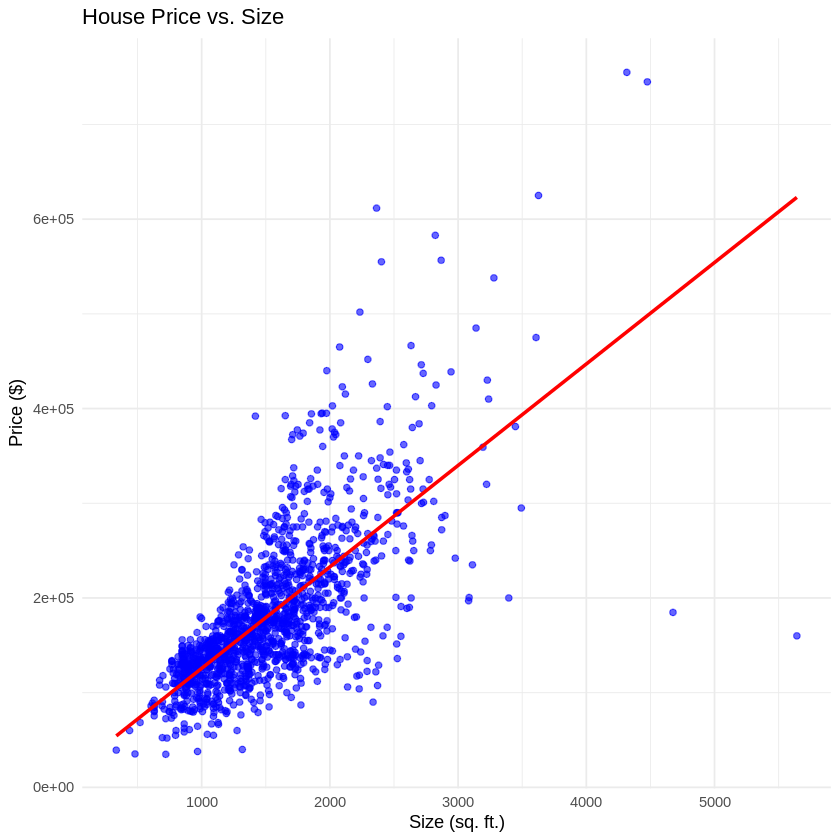

In [2]:
# Step a) Load necessary libraries
# (install them if not already installed)
if(!require(ggplot2)) install.packages("ggplot2", dependencies = TRUE)
if(!require(readr)) install.packages("readr", dependencies = TRUE)

library(ggplot2)
library(readr)

# Step b) Load the dataset
# Download the dataset from Kaggle (you must first download and extract it manually)
# Example: Suppose the file is named "train.csv" and located in your working directory
data <- read_csv("train.csv")

# Display first few rows
head(data)

# Step c) Fit a simple linear regression model
# We'll assume:
#   price column = "SalePrice"
#   size column = "GrLivArea" (Ground Living Area in sq ft)
model <- lm(SalePrice ~ GrLivArea, data = data)

# Step d) Calculate regression coefficients
coefficients <- coef(model)
cat("Intercept:", coefficients[1], "\n")
cat("Slope:", coefficients[2], "\n")

# Step e) Plot regression line and scatter plot
ggplot(data, aes(x = GrLivArea, y = SalePrice)) +
  geom_point(color = "blue", alpha = 0.6) +  # scatter plot
  geom_smooth(method = "lm", color = "red", se = FALSE) +  # regression line
  labs(title = "House Price vs. Size",
       x = "Size (sq. ft.)",
       y = "Price ($)") +
  theme_minimal()


**Program 2**

Graph

a) Create an adjacency list representation for a given undirected graph

b) Implement a function to add an edge between two vertices in the graph.

c) Write an R function to perform DFS traversal on a graph starting from a specific vertex.

References
https://r.igraph.org/index.html

In [5]:
# Install igraph if needed
if(!require(igraph)) install.packages("igraph", dependencies = TRUE)
library(igraph)

Adjacency list:
$A
+ 2/5 vertices, named, from bb0fba5:
[1] B C

$B
+ 2/5 vertices, named, from bb0fba5:
[1] A D

$C
+ 2/5 vertices, named, from bb0fba5:
[1] A E

$D
+ 1/5 vertex, named, from bb0fba5:
[1] B

$E
+ 1/5 vertex, named, from bb0fba5:
[1] C


DFS Traversal starting from A:
[1] "A" "B" "D" "C" "E"


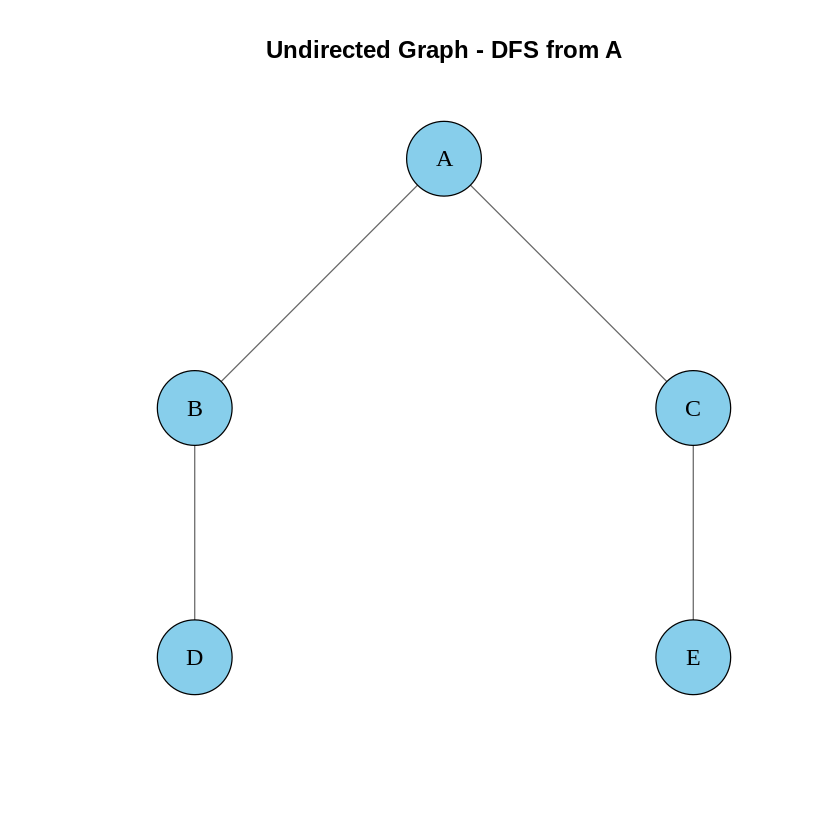

In [9]:
# --- Create an undirected graph ---
g <- make_empty_graph(directed = FALSE) %>%
  add_vertices(5, name = c("A", "B", "C", "D", "E")) %>%
  add_edges(c("A", "B", "A", "C", "B", "D", "C", "E"))

# --- Print adjacency list ---
cat("Adjacency list:\n")
print(adjacent_vertices(g, V(g)))

# --- Perform DFS Traversal ---
# Correct igraph syntax:
dfs_result <- igraph::dfs(
  g,
  root = which(V(g)$name == "A"),   # start from vertex named "A"
  mode = "all",                     # explore all directions (for undirected)
  unreachable = FALSE               # skip unreachable vertices
)

cat("\nDFS Traversal starting from A:\n")
print(V(g)$name[dfs_result$order])

# --- Plot the graph ---
plot(
  g,
  vertex.color = "skyblue",
  vertex.size = 30,
  vertex.label.color = "black",
  vertex.label.cex = 1.2,
  edge.color = "gray40",
  main = "Undirected Graph - DFS from A"
)


**Program 3**

Suppose we have a dataset of motor trend car road tests (mtcars). The
dataset contains information about 32 car brands and 11 attributes. We
want to investigate the correlation between the horsepower (hp) and
miles per gallon (mpg). Perform a Pearson correlation test to analyze
this relationship.

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


Pearson Correlation Coefficient: -0.7761684 

	Pearson's product-moment correlation

data:  mtcars$hp and mtcars$mpg
t = -6.7424, df = 30, p-value = 1.788e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8852686 -0.5860994
sample estimates:
       cor 
-0.7761684 



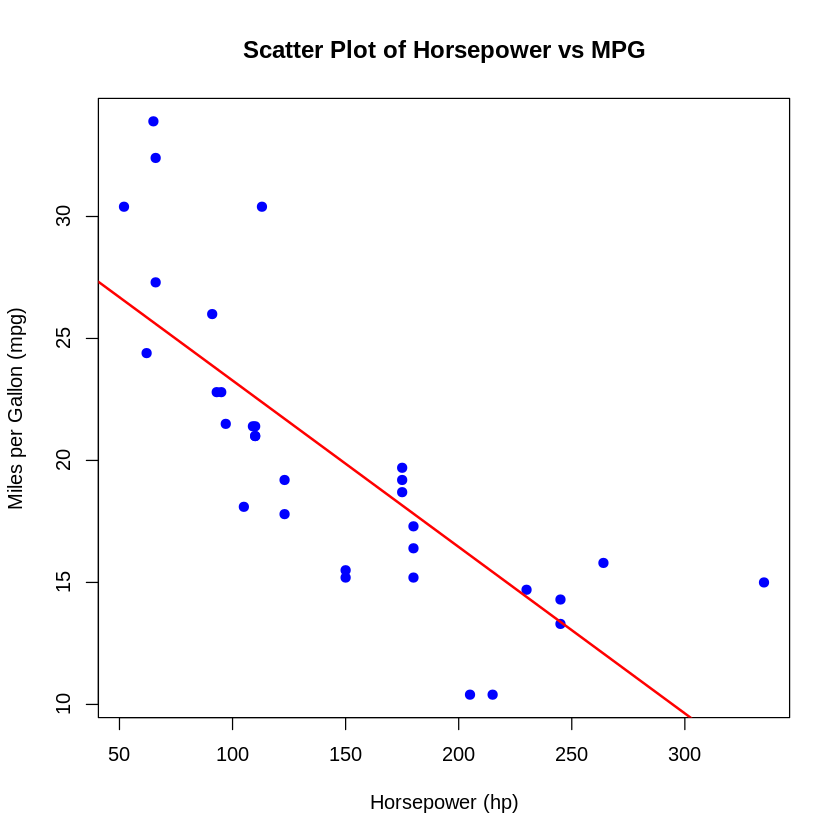

In [7]:
# Load the built-in mtcars dataset
data(mtcars)

# View first few rows
head(mtcars)

# Step 1: Display scatter plot to visualize the relationship
plot(mtcars$hp, mtcars$mpg,
     main = "Scatter Plot of Horsepower vs MPG",
     xlab = "Horsepower (hp)",
     ylab = "Miles per Gallon (mpg)",
     pch = 19, col = "blue")

# Add a regression line
abline(lm(mpg ~ hp, data = mtcars), col = "red", lwd = 2)

# Step 2: Compute Pearson correlation coefficient
correlation <- cor(mtcars$hp, mtcars$mpg, method = "pearson")
cat("Pearson Correlation Coefficient:", correlation, "\n")

# Step 3: Perform Pearson correlation test
test_result <- cor.test(mtcars$hp, mtcars$mpg, method = "pearson")

# Display test result
print(test_result)


**Program 4**

Suppose we have a dataset of motor trend car road tests (mtcars). The
dataset contains information about 32 car brands and 11 attributes. We
want to investigate whether there are any significant variations in the
average displacement (disp) across different gear types (gear). Perform
a one-way ANOVA test to analyze this

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


            Df Sum Sq Mean Sq F value   Pr(>F)    
gear         2 280221  140110   20.73 2.56e-06 ***
Residuals   29 195964    6757                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

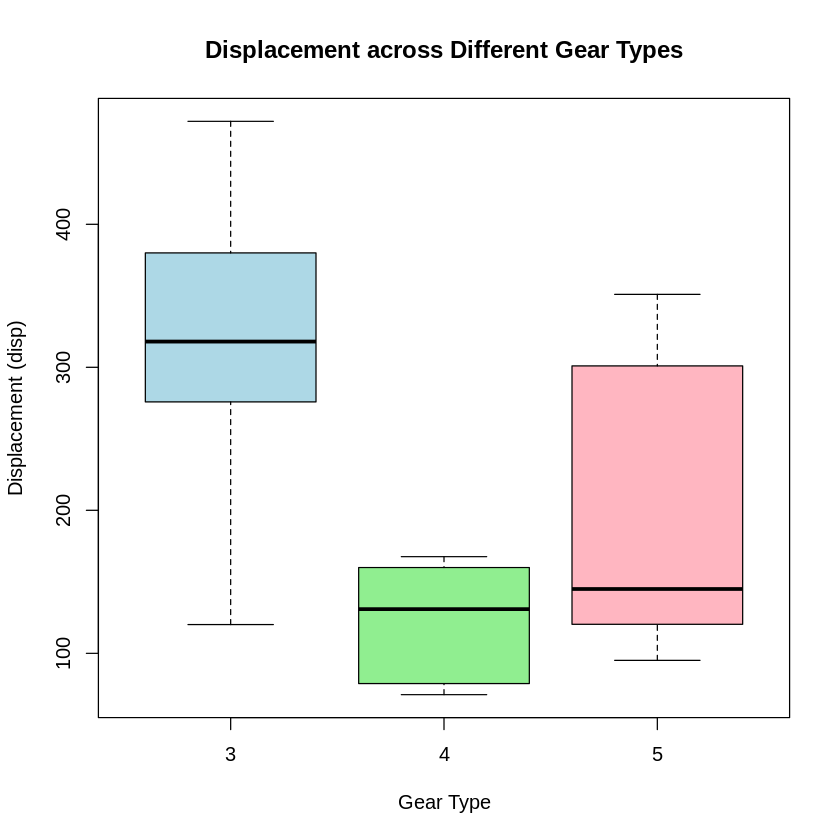

In [10]:
# Load the built-in dataset
data(mtcars)

# View first few rows
head(mtcars)

# Step 1: Convert 'gear' to a factor (categorical variable)
mtcars$gear <- as.factor(mtcars$gear)

# Step 2: Perform one-way ANOVA
anova_result <- aov(disp ~ gear, data = mtcars)

# Step 3: Display ANOVA summary
summary(anova_result)

# Step 4: Optional – visualize the data
boxplot(disp ~ gear, data = mtcars,
        main = "Displacement across Different Gear Types",
        xlab = "Gear Type",
        ylab = "Displacement (disp)",
        col = c("lightblue", "lightgreen", "lightpink"))


**Program 5**

 We want to investigate the behavior of the total positive COVID-19 cases weekly from 22 January 2020 to 15 December 2020 in India. Perform the following tasks:

Data set link https://raw.githubusercontent.com/datasets/covid-
19/master/data/time-series-19-covid-combined.csv

a) Univariate Time Series Analysis:

1.   Create a time series object for the total positive COVID-19 cases
2.   Visualize the time series data using a line chart.

b) Multivariate Time Series Analysis:

1.   Also, consider the total deaths from COVID-19 during the same period.
2.   Create a multivariate time series object that includes both the total positive cases and total deaths.

1.   Plot both series on a single chart.

c) Time Series Forecasting:

1.   Use the auto.arima() function from the forecast library to fit an ARIMA model to the total positive cases.

1.   Forecast the next 5 data points.
2.   Plot the forecasted values.

In [12]:
# -------------------------------
# Step 0: Install & load packages
# -------------------------------
if(!require(forecast)) install.packages("forecast", dependencies = TRUE)
if(!require(ggplot2)) install.packages("ggplot2", dependencies = TRUE)
if(!require(dplyr)) install.packages("dplyr", dependencies = TRUE)
if(!require(lubridate)) install.packages("lubridate", dependencies = TRUE)

Loading required package: forecast

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘forecast’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘x13binary’, ‘colorspace’, ‘forecTheta’, ‘seasonal’




Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



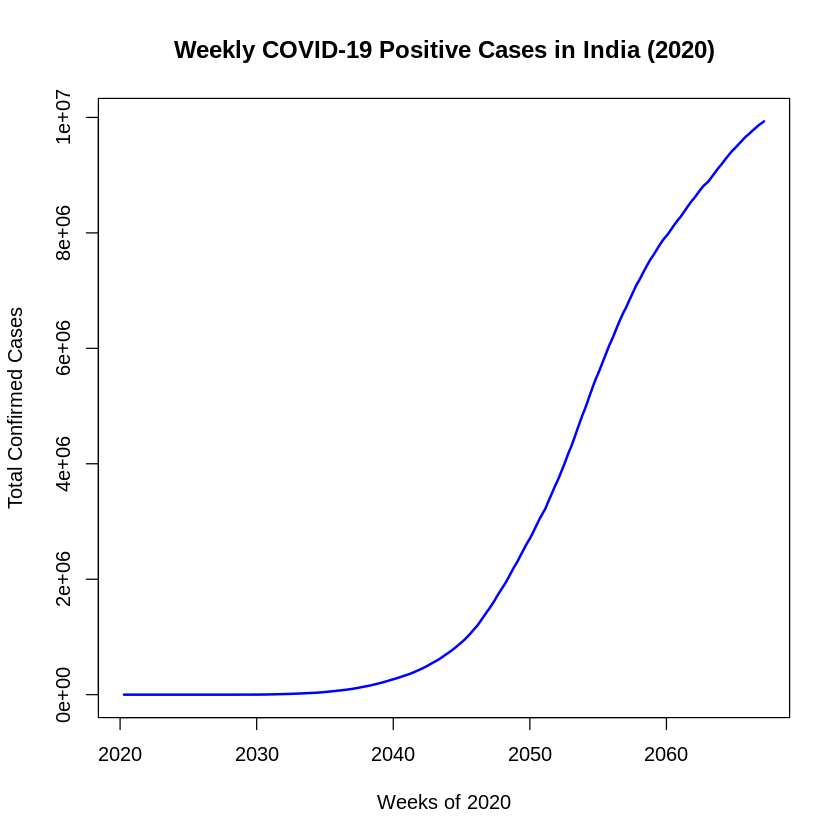

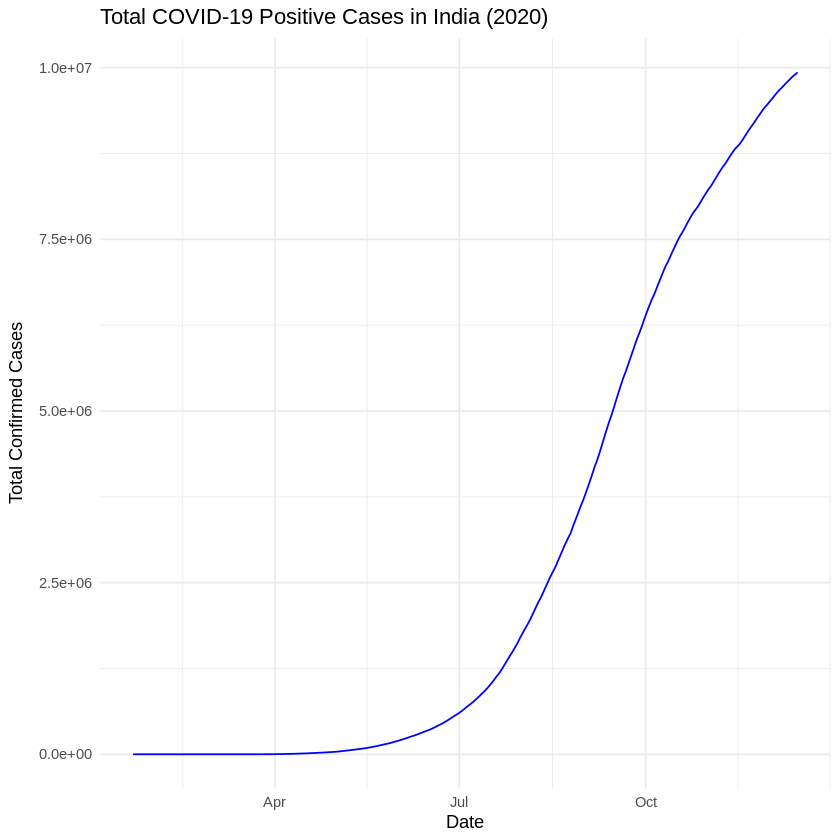

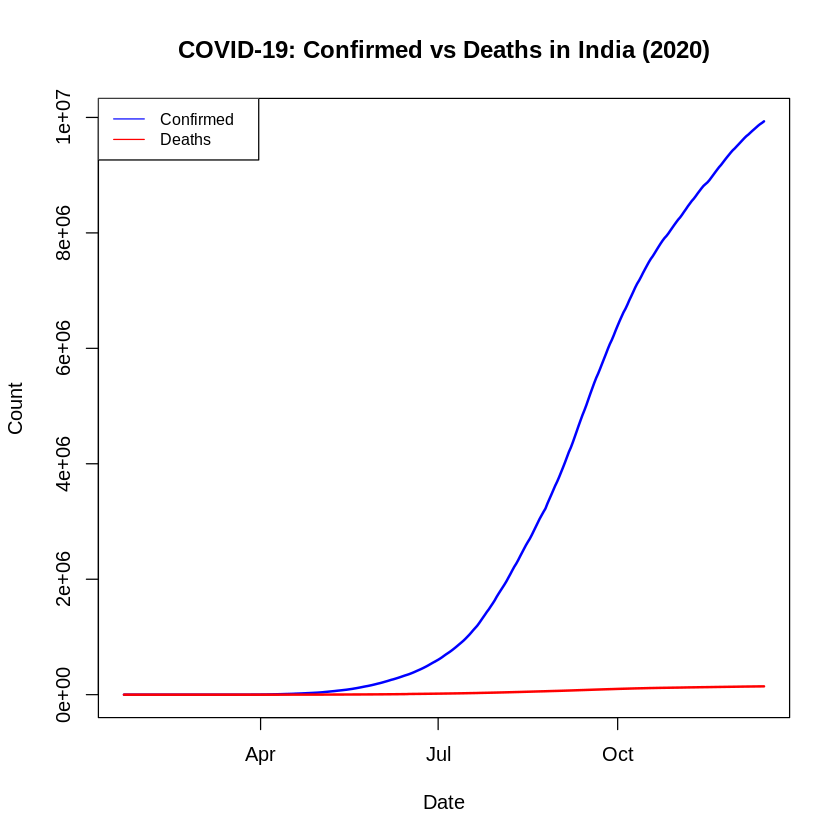

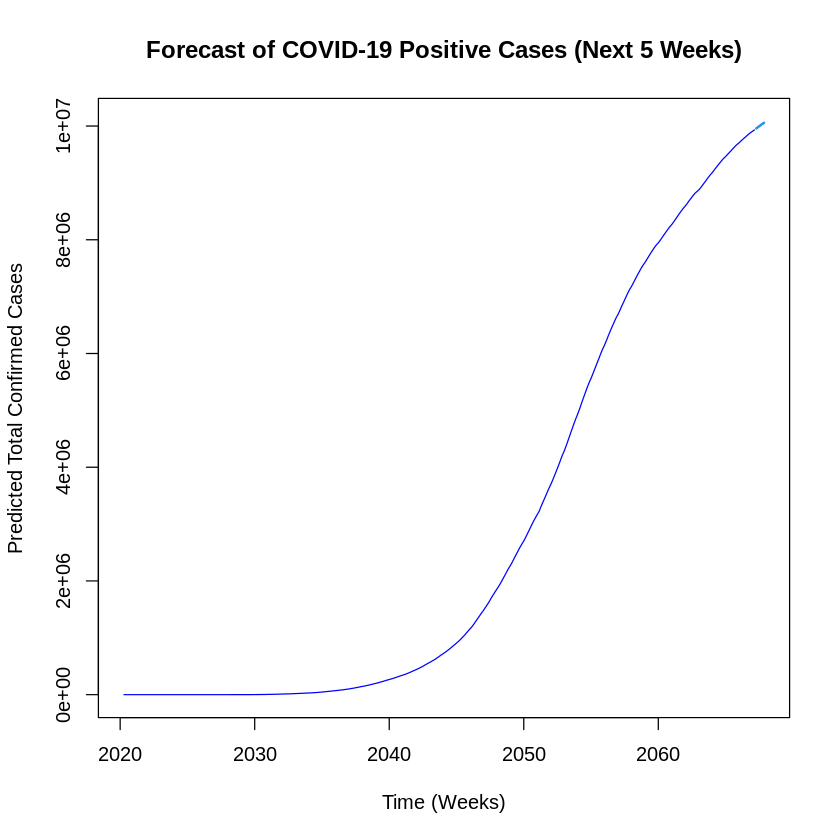

In [13]:
library(forecast)
library(ggplot2)
library(dplyr)
library(lubridate)

# ----------------------------------------
# a) UNIVARIATE TIME SERIES (Positive cases)
# ----------------------------------------

# Step i: Load dataset from GitHub
url <- "https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv"
covid <- read.csv(url)

# Step ii: Filter data for India and required date range
covid_india <- covid %>%
  filter(Country.Region == "India") %>%
  mutate(Date = as.Date(Date)) %>%
  filter(Date >= "2020-01-22" & Date <= "2020-12-15")

# Step iii: Create time series object for total confirmed cases
cases_ts <- ts(covid_india$Confirmed, frequency = 7,
               start = c(2020, as.numeric(format(min(covid_india$Date), "%U"))))

# Step iv: Visualize the time series
plot(cases_ts,
     main = "Weekly COVID-19 Positive Cases in India (2020)",
     xlab = "Weeks of 2020",
     ylab = "Total Confirmed Cases",
     col = "blue",
     lwd = 2)

# Alternatively using ggplot2
ggplot(covid_india, aes(x = Date, y = Confirmed)) +
  geom_line(color = "blue") +
  labs(title = "Total COVID-19 Positive Cases in India (2020)",
       x = "Date", y = "Total Confirmed Cases") +
  theme_minimal()


# ------------------------------------------------
# b) MULTIVARIATE TIME SERIES (Cases + Deaths)
# ------------------------------------------------

# Step i & ii: Create a multivariate time series with Confirmed and Deaths
multi_ts <- ts(cbind(covid_india$Confirmed, covid_india$Deaths), frequency = 7,
               start = c(2020, as.numeric(format(min(covid_india$Date), "%U"))))

colnames(multi_ts) <- c("Confirmed", "Deaths")

# Step iii: Plot both series on one chart
matplot(covid_india$Date, multi_ts, type = "l", lwd = 2,
        col = c("blue", "red"), lty = 1,
        main = "COVID-19: Confirmed vs Deaths in India (2020)",
        xlab = "Date", ylab = "Count")
legend("topleft", legend = c("Confirmed", "Deaths"),
       col = c("blue", "red"), lty = 1, cex = 0.8)


# ------------------------------------------------
# c) TIME SERIES FORECASTING (ARIMA model)
# ------------------------------------------------

# Step i: Fit ARIMA model using auto.arima()
fit <- auto.arima(cases_ts)

# Step ii: Forecast next 5 data points
forecast_cases <- forecast(fit, h = 5)

# Step iii: Plot forecasted values
plot(forecast_cases,
     main = "Forecast of COVID-19 Positive Cases (Next 5 Weeks)",
     xlab = "Time (Weeks)",
     ylab = "Predicted Total Confirmed Cases",
     col = "blue")


**Program 6**

The Boston data set comes from the real estate industry in Boston (US).

This is a regression problem. The data has 506 rows and 14 columns.

a. Perform data exploration and visualization using R programing.

b. Perform Regression analysis on the dataset.

c. Predict the median value of owner occupied homes.

https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

In [14]:
# Boston_Housing_EDA_and_Regression.R
# Comprehensive R script to perform EDA, visualization, regression modeling,
# and prediction for the Boston Housing dataset (506 rows, 14 columns).
# Usage:
# 1) If you have a CSV (from Kaggle), change path in read.csv().
# 2) Otherwise the script will fall back to MASS::Boston (if MASS installed).

# -------------------------
# 0. Install & load packages
# -------------------------
required_packages <- c("tidyverse", "GGally", "ggcorrplot", "caret", "glmnet", "car", "broom", "cowplot", "scales")
new.packages <- required_packages[!(required_packages %in% installed.packages()[,"Package"]) ]
if(length(new.packages)) install.packages(new.packages)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘rbibutils’, ‘prodlim’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘patchwork’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘ggstats’, ‘reshape2’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘shape’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [16]:
library(tidyverse)
library(GGally)
library(ggcorrplot)
library(caret)
library(glmnet)
library(car)
library(broom)
library(cowplot)
library(scales)

set.seed(123)

# -------------------------
# 1. Load data
# -------------------------
# Option A: if you downloaded Boston CSV from Kaggle, set file path here:
csv_path <- "./boston_housing.csv"  # <- change to your path if needed

if(file.exists(csv_path)){
  boston <- read.csv(csv_path, stringsAsFactors = FALSE)
} else {
  # fallback: use MASS::Boston
  if(!("MASS" %in% installed.packages()[,"Package"])) install.packages("MASS")
  library(MASS)
  boston <- as_tibble(MASS::Boston)
}

# Quick peek
glimpse(boston)
summary(boston)

# Ensure target variable named 'medv' or 'MEDV' or 'MEDV' -> we'll standardize to 'MEDV'
if(!("medv" %in% tolower(names(boston)))){
  names(boston) <- tolower(names(boston))
}

# If dataset uses 'medv' or 'medv' column exists, use it; else prompt user to rename manually
if(!("medv" %in% names(boston))){
  stop("Target column 'medv' not found. Please ensure your dataset has 'medv' (median value) column.")
}

# -------------------------
# 2. Basic EDA
# -------------------------
cat("Dataset dimensions:", dim(boston)[1], "rows x", dim(boston)[2], "columns\n")

# Check missing values
missing_summary <- map_dbl(boston, ~sum(is.na(.)))
print(missing_summary)

# Summary statistics table
stats_table <- boston %>% summarise_all(list(mean = ~mean(., na.rm=TRUE), sd = ~sd(., na.rm=TRUE), min = ~min(., na.rm=TRUE), max = ~max(., na.rm=TRUE)))
print(head(stats_table))

# Distribution of target (medv)
p1 <- ggplot(boston, aes(x = medv)) +
  geom_histogram(bins = 30) +
  labs(title = "Distribution of MEDV (Median house value)", x = "MEDV (in $1000s)")

p2 <- ggplot(boston, aes(sample = medv)) + stat_qq() + stat_qq_line() +
  labs(title = "Q-Q plot of MEDV")

# Numeric pairwise relationships (subset to avoid overplotting) - use GGally ggpairs for small subset
num_cols <- boston %>% select_if(is.numeric)

# Correlation heatmap
corr_mat <- cor(num_cols)
cor_plot <- ggcorrplot(corr_mat, hc.order = TRUE, type = "lower", lab = TRUE) +
  ggtitle("Correlation matrix (lower triangle)")

# Pair plot for selected important features vs medv
selected_vars <- c("rm","lstat","ptratio","crim","nox","medv")
if(all(selected_vars %in% names(boston))){
  pair_plot <- ggpairs(dplyr::select(boston, all_of(selected_vars)), title = "Pair plot: selected vars")
} else {
  pair_plot <- NULL
}

# Boxplots of MEDV by CHAS (Charles River dummy variable)
if("chas" %in% names(boston)){
  p_box_chas <- ggplot(boston, aes(x = factor(chas), y = medv)) +
    geom_boxplot() + labs(x = "chas (0 = no, 1 = yes)", title = "MEDV by CHAS")
} else p_box_chas <- NULL

# Display EDA plots in a grid (if interactive R/session)
plot_list <- list(p1, p2, cor_plot)
if(!is.null(pair_plot)) plot_list <- c(plot_list, list(pair_plot))
if(!is.null(p_box_chas)) plot_list <- c(plot_list, list(p_box_chas))

# Save plots to a file
ggsave("boston_medv_hist.png", plot = p1, width=7, height=4)
ggsave("boston_medv_qq.png", plot = p2, width=6, height=4)
ggsave("boston_corrplot.png", plot = cor_plot, width=8, height=6)

# -------------------------
# 3. Prepare data for modeling
# -------------------------
# Split into train/test (80/20)
set.seed(123)
train_index <- createDataPartition(boston$medv, p = 0.8, list = FALSE)
train <- boston[train_index, ]
test <- boston[-train_index, ]

# Feature engineering: check for categorical variables (only 'chas' is binary)
train$chas <- as.factor(train$chas)
test$chas <- as.factor(test$chas)

# Scale numeric variables for models that need scaling (glmnet)
num_vars <- train %>% select_if(is.numeric) %>% names()
num_vars <- setdiff(num_vars, "medv")

preProcValues <- preProcess(train[, num_vars], method = c("center", "scale"))
train_scaled <- train
train_scaled[, num_vars] <- predict(preProcValues, train[, num_vars])

test_scaled <- test
test_scaled[, num_vars] <- predict(preProcValues, test[, num_vars])

# -------------------------
# 4. Linear Regression (all predictors)
# -------------------------
lm_formula <- as.formula(paste("medv ~", paste(setdiff(names(train), "medv"), collapse = " + ")))
full_lm <- lm(lm_formula, data = train)
summary(full_lm)

# Check multicollinearity
vifs <- vif(full_lm)
print(vifs)

# Stepwise selection (both directions) based on AIC
step_lm <- step(full_lm, direction = "both", trace = 0)
summary(step_lm)

# Diagnostics plots (saved)
png("lm_residuals_plot.png", width=800, height=800)
par(mfrow=c(2,2))
plot(step_lm)
dev.off()

# -------------------------
# 5. Regularization: LASSO (glmnet)
# -------------------------
# Prepare x,y for glmnet (one-hot for factor)
x_train <- model.matrix(medv ~ ., train_scaled)[,-1]
y_train <- train_scaled$medv
x_test <- model.matrix(medv ~ ., test_scaled)[,-1]
y_test <- test_scaled$medv

# LASSO (alpha = 1)
cv_lasso <- cv.glmnet(x_train, y_train, alpha = 1)
best_lambda <- cv_lasso$lambda.min
best_lambda
lasso_mod <- glmnet(x_train, y_train, alpha = 1, lambda = best_lambda)
coef(lasso_mod)

# -------------------------
# 6. Model evaluation on test set
# -------------------------
# Predictions
pred_lm <- predict(step_lm, newdata = test)
pred_lasso <- predict(lasso_mod, s = best_lambda, newx = x_test)

# Metrics function
rmse <- function(actual, predicted) sqrt(mean((actual - predicted)^2))
mae <- function(actual, predicted) mean(abs(actual - predicted))
r2 <- function(actual, predicted) 1 - sum((actual - predicted)^2)/sum((actual - mean(actual))^2)

metrics <- tibble(
  model = c("Linear (stepwise)", "LASSO (cv)"),
  RMSE = c(rmse(test$medv, pred_lm), rmse(test$medv, as.numeric(pred_lasso))),
  MAE = c(mae(test$medv, pred_lm), mae(test$medv, as.numeric(pred_lasso))),
  R2 = c(r2(test$medv, pred_lm), r2(test$medv, as.numeric(pred_lasso)))
)
print(metrics)

# Scatter plot: actual vs predicted
p_actual_pred_lm <- ggplot(test, aes(x = medv, y = pred_lm)) +
  geom_point() + geom_abline(slope=1, intercept=0) +
  labs(title = "Actual vs Predicted: Linear (stepwise)", x = "Actual MEDV", y = "Predicted MEDV")

p_actual_pred_lasso <- ggplot(test, aes(x = medv, y = as.numeric(pred_lasso))) +
  geom_point() + geom_abline(slope=1, intercept=0) +
  labs(title = "Actual vs Predicted: LASSO", x = "Actual MEDV", y = "Predicted MEDV")

ggsave("actual_vs_pred_lm.png", plot = p_actual_pred_lm, width=6, height=4)
ggsave("actual_vs_pred_lasso.png", plot = p_actual_pred_lasso, width=6, height=4)

# -------------------------
# 7. Variable importance (for linear model)
# -------------------------
tidy_step <- broom::tidy(step_lm) %>% arrange(desc(abs(estimate)))
print(tidy_step)
write.csv(tidy_step, "linear_model_coefficients.csv", row.names = FALSE)

# For LASSO, get non-zero coefficients
lasso_coefs <- as.matrix(coef(lasso_mod))
lasso_nonzero <- lasso_coefs[lasso_coefs[,1] != 0, , drop = FALSE]
print(lasso_nonzero)

# -------------------------
# 8. Prediction example: new single observation
# -------------------------
# Example: take first row of test as new data
new_obs <- test[1, , drop = FALSE]
pred_new_lm <- predict(step_lm, newobs = new_obs)
# For lasso, must scale numeric variables using preProcValues and create model.matrix
new_obs_scaled <- new_obs
new_obs_scaled[, num_vars] <- predict(preProcValues, new_obs[, num_vars])
new_x <- model.matrix(medv ~ ., new_obs_scaled)[,-1]
pred_new_lasso <- predict(lasso_mod, s = best_lambda, newx = new_x)

cat("Example prediction for one observation (actual):", new_obs$medv, "\n")
cat("Linear (stepwise) predicted:", pred_new_lm, "\n")
cat("LASSO predicted:", as.numeric(pred_new_lasso), "\n")

# Save predictions for the test set
test_out <- test %>% mutate(pred_lm = as.numeric(pred_lm), pred_lasso = as.numeric(pred_lasso))
write.csv(test_out, "boston_test_predictions.csv", row.names = FALSE)

# -------------------------
# 9. Save models (optional)
# -------------------------
saveRDS(step_lm, file = "stepwise_lm_model.rds")
saveRDS(lasso_mod, file = "lasso_model.rds")

# -------------------------
# End of script
# -------------------------

cat("Script complete. Key outputs saved:\n - boston_medv_hist.png\n - boston_medv_qq.png\n - boston_corrplot.png\n - lm_residuals_plot.png\n - actual_vs_pred_lm.png\n - actual_vs_pred_lasso.png\n - linear_model_coefficients.csv\n - boston_test_predictions.csv\n - stepwise_lm_model.rds\n - lasso_model.rds\n")


Rows: 506
Columns: 14
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15…
$ black   <dbl> 396.90, 396.90, 392.83, 394.63, 396.90, 394.12, 395.60, 396.90…
$ lstat   <dbl> 4.

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

Dataset dimensions: 506 rows x 14 columns
   crim      zn   indus    chas     nox      rm     age     dis     rad     tax 
      0       0       0       0       0       0       0       0       0       0 
ptratio   black   lstat    medv 
      0       0       0       0 
# A tibble: 1 × 56
  crim_mean zn_mean indus_mean chas_mean nox_mean rm_mean age_mean dis_mean
      <dbl>   <dbl>      <dbl>     <dbl>    <dbl>   <dbl>    <dbl>    <dbl>
1      3.61    11.4       11.1    0.0692    0.555    6.28     68.6     3.80
# ℹ 48 more variables: rad_mean <dbl>, tax_mean <dbl>, ptratio_mean <dbl>,
#   black_mean <dbl>, lstat_mean <dbl>, medv_mean <dbl>, crim_sd <dbl>,
#   zn_sd <dbl>, indus_sd <dbl>, chas_sd <dbl>, nox_sd <dbl>, rm_sd <dbl>,
#   age_sd <dbl>, dis_sd <dbl>, rad_sd <dbl>, tax_sd <dbl>, ptratio_sd <dbl>,
#   black_sd <dbl>, lstat_sd <dbl>, medv_sd <dbl>, crim_min <dbl>,
#   zn_min <dbl>, indus_min <dbl>, chas_min <int>, nox_min <dbl>, rm_min <dbl>,
#   age_min <dbl>, dis_min <dbl>, ra


Call:
lm(formula = lm_formula, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9550  -2.7996  -0.4647   1.7767  25.0993 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.733617   5.619935   6.714 6.63e-11 ***
crim         -0.093857   0.039157  -2.397 0.016999 *  
zn            0.039436   0.015987   2.467 0.014062 *  
indus        -0.012988   0.069595  -0.187 0.852059    
chas1         2.290187   0.940621   2.435 0.015346 *  
nox         -17.130560   4.342272  -3.945 9.45e-05 ***
rm            3.499219   0.451445   7.751 7.87e-14 ***
age           0.009823   0.015510   0.633 0.526905    
dis          -1.390769   0.230614  -6.031 3.77e-09 ***
rad           0.330939   0.077135   4.290 2.25e-05 ***
tax          -0.012386   0.004342  -2.852 0.004568 ** 
ptratio      -0.960676   0.150307  -6.391 4.66e-10 ***
black         0.009841   0.002935   3.353 0.000877 ***
lstat        -0.562095   0.059180  -9.498  < 2e-16 ***
---
Signif

    crim       zn    indus     chas      nox       rm      age      dis 
1.844585 2.323334 3.956419 1.066866 4.447852 1.911905 3.213786 4.065420 
     rad      tax  ptratio    black    lstat 
8.152643 9.660128 1.851645 1.364539 3.131835 



Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.0826  -2.7796  -0.4605   1.7818  25.4524 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.517928   5.576559   6.728 6.07e-11 ***
crim         -0.094346   0.039042  -2.416 0.016123 *  
zn            0.038552   0.015811   2.438 0.015195 *  
chas1         2.289157   0.932318   2.455 0.014505 *  
nox         -16.651928   4.010077  -4.153 4.03e-05 ***
rm            3.569475   0.437455   8.160 4.54e-15 ***
dis          -1.425853   0.213439  -6.680 8.12e-11 ***
rad           0.330725   0.074617   4.432 1.21e-05 ***
tax          -0.012607   0.004010  -3.144 0.001793 ** 
ptratio      -0.957908   0.147191  -6.508 2.31e-10 ***
black         0.010003   0.002919   3.427 0.000674 ***
lstat        -0.548693   0.054617 -10.046  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’

agg_record_442099291 
                   2

[1] 0.007642659

14 x 1 sparse Matrix of class "dgCMatrix"
                    s0
(Intercept) 22.3414325
crim        -0.7515532
zn           0.8617697
indus       -0.1051242
chas1        2.2945664
nox         -1.9394702
rm           2.5714057
age          0.2325827
dis         -2.8605128
rad          2.7702819
tax         -1.9827037
ptratio     -2.0598672
black        0.9271539
lstat       -3.9887869

# A tibble: 2 × 4
  model              RMSE   MAE    R2
  <chr>             <dbl> <dbl> <dbl>
1 Linear (stepwise)  4.56  3.36 0.760
2 LASSO (cv)         4.59  3.37 0.758
# A tibble: 12 × 5
   term        estimate std.error statistic  p.value
   <chr>          <dbl>     <dbl>     <dbl>    <dbl>
 1 (Intercept)  37.5      5.58         6.73 6.07e-11
 2 nox         -16.7      4.01        -4.15 4.03e- 5
 3 rm            3.57     0.437        8.16 4.54e-15
 4 chas1         2.29     0.932        2.46 1.45e- 2
 5 dis          -1.43     0.213       -6.68 8.12e-11
 6 ptratio      -0.958    0.147       -6.51 2.31e-10
 7 lstat        -0.549    0.0546     -10.0  2.68e-21
 8 rad           0.331    0.0746       4.43 1.21e- 5
 9 crim         -0.0943   0.0390      -2.42 1.61e- 2
10 zn            0.0386   0.0158       2.44 1.52e- 2
11 tax          -0.0126   0.00401     -3.14 1.79e- 3
12 black         0.0100   0.00292      3.43 6.74e- 4
                    s0
(Intercept) 22.3414325
crim        -0.7515532
